In [8]:
import sys
sys.path.append('..')

**Uwaga! Tylko dla użytkowników Colaba:**

In [ ]:
%%bash
add-apt-repository ppa:ubuntu-toolchain-r/test
apt-get update --fix-missing
apt-get dist-upgrade
wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
chmod +x Miniconda3-latest-Linux-x86_64.sh
./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
conda config --set always_yes yes --set changeps1 no
conda install -q -y -c conda-forge python=3.7 rdkit

In [10]:
!pip install py3Dmol

In [11]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

try:
    from rdkit import Chem
    from rdkit.Chem.Draw import IPythonConsole
except ImportError:
    print('Stopping RUNTIME. Colaboratory will restart automatically. Please run cell again.')
    exit()

# Python 🐍

## Przygotowanie środowiska

Na zajęciach będziemy używać **Pythona**. Instrukcja instalacji potrzebnych paczek znajduje się w README na głównej stronie repozytorium przedmiotu. Większość ćwiczeń odbywać będzie się poprzez notatniki **Jupyter**. Aby uruchomić notatnik należy:

1. Uruchomić stworzone środowisko condy: `conda activate mldd`
2. Uruchomić serwer Jupyter poleceniem: `jupyter notebook` (najlepiej w folderze `labs`)
3. Notatnik powinien się uruchomić automatycznie, ale jeśli się tak nie stanie, to w przeglądarce należy wpisać adres `localhost:8888` (port 8888 jest domyślny, a dokładny port można znaleźć w komunikacie zwróconym przez komendę w poprzednim kroku)

Alternatywą jest użycie [**Colaba**](colab.research.google.com), który nie wymaga instalowania paczek i uruchamiania notatnika na własnym komputerze. Obliczenia i wyniki zapisywane są na dysku Google. Minusem tego rozwiązania jest to, że część paczek chemicznych może być trudna do zainstalowania w tym notatniku.

## Dla początkujących

Kursy Pythona:
- Materiały z kursu UJ ["Python for data processing"](https://github.com/gmum/python-for-data-processing)
- Wykłady z kursu MIT ["Introduction to Computer Science and Programming in Python"](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/lecture-videos/index.htm)

# Uczenie maszynowe w pigułce 💊

Uczenie maszynowe to poddziedzina szeroko rozumianej **sztucznej inteligencji**. Metody uczenia maszynowego samodoskonalą się przy użyciu dostępnych danych. Podczas kursu będziemy mieć głównie do czynienia z **metodami nadzorowanymi**, w których dane treningowe mają przypisane interesujące nas etykiety. Na przykład w problemie przewidywania toksyczności związku będziemy mieli reprezentację związku i indykator jego toksyczności (toksyczny lub nietoksyczny). Gdy etykiety są dyskretne, tj. mamy klasy lub kategorie, mówimy o **metodach klasyfikacji**. W przypadku etykiet ciągłych (np. rozpuszczalność związku może być podana w gramach na litr rozpuszczalnika) mówimy o **metodach regresji**.

Zahaczymy też o **metody nienadzorowane**, czyli takie, gdzie etykiety nie są znane i szukać będziemy zależności w danych bez dodatkowej wiedzy o przynależności do klas. Najbardziej typowym przykładem będą tutaj **metody generatywne**, do których będziemy dostarczać same reprezentacje związków, a model sam będzie uczył się generować nowe molekuły, a więc będzie uczył się cech wspólnych dla zbioru treningowego i podobieństwa. Innym przykładem metod nienadzorowanych jest **klastrowanie** zwane też **analizą skupisk**, którego celem jest wyodrębnienie grup podobnych obiektów.

Istnieje również klasa metod, które same generują dla siebie dane poprzez interakcję ze środowiskiem (może być wirtualne). Takie algorytmy nazywamy **uczeniem przez wzmocnienie**. W projektowaniu leków często wykorzystuje się te metody, aby optymalizować generowane propozycje związków chemicznych.

## Trochę formalizmu matematycznego

Wzorki matematyczne nie są kluczowe do zrozumienia przedmiotu, ale pomagają w czytaniu publikacji, które z kolei mogą stać się literaturą potrzebną do realizacji projektu. Warto też ustandaryzować nazewnictwo zmiennych w kodzie.

Aby uprościć notację podczas kursu, przyjmijmy, że dane będziemy oznaczać literą $x\in \mathcal{X}$, a etykiety literą $y\in \mathcal{Y}$. Modele będziemy oznaczać przez $f: \mathcal{X} \to \mathcal{Y}$, a ich parametry literami greckimi, np. $\phi$. Czasami będziemy pisać $f_\phi$, aby zaznaczyć, że model $f$ zależy od parametrów $\phi$.

Dla przykładu w uczeniu nadzorowanym będziemy mieć zbiór danych $\mathcal{D}=\{(x_i, y_i): x_i \in \mathcal{X} \land y_i \in \mathcal{Y}\}$, a zadaniem będzie znalezienie takich parametrów modelu $\phi$, żeby $f_\phi(x) \approx y$ dla dowolnego "sensownego" $x$ i jego prawdziwej etykiety $y$. Dla typowej regresji, nasz cel dla $N$ danych treningowych można opisać następująco:
$$ {\arg \min}_\phi \frac{1}{N}\sum_{i=1}^N (f_\phi(x_i) - y_i)^2 $$

*Na marginesie: W trakcie kursu zwykle $x$ będzie jakąś reprezentacją związku chemicznego.*

## Materiały

Kursy godne polecenia:
- Materiały z kursu UJ ["Sieci neuronowe"](https://github.com/gmum/nn2019)
- Kurs na platformie Coursera ["Machine learning"](https://www.coursera.org/learn/machine-learning)
- Materiały z kursu UJ ["Nauczanie maszynowe"](https://github.com/gmum/ml2017)
- Specjalizacja (seria kursów) na platformie Coursera ["Deep learning specialization"](https://www.coursera.org/specializations/deep-learning)

## Przykładowy kod regresji liniowej

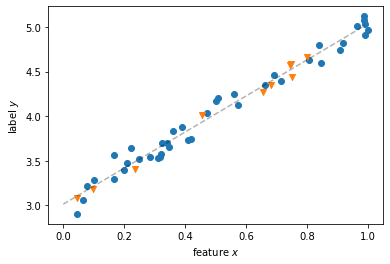

In [12]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np


x = np.random.uniform(0., 1., size=50)
y = 2 * x + 3 + np.random.normal(scale=0.1, size=50)

x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

x_range = np.arange(0., 1., 0.01)
y_pred = reg.predict(x_range.reshape(-1, 1))

plt.plot(x_range, y_pred, c='k', ls='--', alpha=0.3)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='v')
plt.xlabel('feature $x$')
plt.ylabel('label $y$')
plt.show()

# Bariera chemia-komputer 🧪

Związki chemiczne nie należą do danych najbardziej przyjaznych dla komputera. Ze względu na wilowymiarowość tych danych, nie da się ich w łatwy sposób zapisać na bitach dysku twardego. Do różnych zastosować sprawdzą się różne reprezentacje związków. Poniżej przedstawione są 2 standardowe reprezentacje molekularne. Pierwsza z nich służy do przechowywania zbiorów związków chemicznych na komputerze. Druga natomiast nadaje się do wykorzystania przez klasyczne modele uczenia maszynowego.

*Na marginesie: Związki również w organizmie mają do pokonania wiele przeszkód, a jedną z nich jest bariera krew-mózg, do której nawiązuje tytuł sekcji. Niektórzy więc mogą poczuć się rozczarowani, że tabletka nie trafia prosto w źródło bólu, a mądry syropek do płuc. Więcej o przeszkodach leku na drodze do swojego celu omówione zostanie w późniejszej części kursu.*

## SMILES

SMILES jest reprezentacją tekstową związku. Jest to podstawowy rodzaj reprezentacji związku w zbiorach danych z dwóch prostych powodów:

1. tekst łatwo zapisać do plików typu CSV,
2. reprezentacja ta jednoznacznie identyfikuje związek (w dużym stopniu też jego ułożenie przestrzenne).

Oczywiście nie brak też minusów tej reprezentacji. Jednym z nich jest niejednoznaczne przekształcenie w drugą stronę, a więc ten sam związek może być reprezentowany przez kilka różnych ciągów znakowych SMILES. Reprezentacja liniowa nie oddaje też złożoności struktur chemicznych.

### Uproszczona procedura przekształcania związku na SMILES

![smiles](https://upload.wikimedia.org/wikipedia/commons/0/00/SMILES.png)

1. Przygotuj wzór strukturalny związku;
2. Rozetnij wszystkie pierścienie (cykle), aby powstało spójne drzewo atomów;
3. Wybierz dowolnie atom początkowy i wypisuj kolejne wiązania i symbole atomów, poruszając się po związku (kolejność DFS);
4. Alternatywne ścieżki obejmuj w nawiasy, aby zaznaczyć rozgałęzienie;
5. Atomy przy rozcięciu pierścieni (cykli) opatrz pasującymi indeksami liczbowymi (uważaj na kolizje indeksów!).

Powyższy algorytm można rozszerzyć również o zasady kolejności, np. "znajdź najdłuższą ścieżkę we wzorze strukturalnym i potraktuj jako główną", co pozwoli na uzyskanie jednoznacznej reprezentacji, zwanej **kanonicznym SMILES**.

Istnieją też oznaczenia pozwalające określić geometrię przestrzenną związku. Poniżej podane są związki w postaci SMILES i kod tworzący ich wizualizację 3D. Obejrzyj, jak znane leki prezentują się w przestrzeni.

#### Popularne substancje z apteki (i nie tylko)

1. Ibuprofen: `CC(C)CC1=CC=C(C=C1)C(C)C(=O)O` lub `CC(C)Cc1ccc(cc1)C(C)C(=O)O`
2. Penicylina: `CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C` lub `CC1(C(N2C(S1)C(C2=O)NC(=O)CC1=CC=CC=C1)C(=O)O)C`
3. Fluoksetyna: `CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F`
4. THC: `CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1)O`

#### SMILES a ułożenie przestrzenne atomów

Ułożenie przestrzenne ma duże znaczenie w projektowaniu leków. Czasem może się okazać, że 2 związki o takim samym wzorze strukturalnym (ale nie uwzględniającym geometrii), mają zupełnie inne działanie aktywne. Przykładem jest talidomid, który jest lekiem przeciwbólowym i przeciwwymiotnym, a jego lustrzane odbicie powoduje deformację płodu u osób w ciąży.

(R)-talidomid: `C1CC(=O)NC(=O)[C@@H]1N2C(=O)C3=CC=CC=C3C2=O`

(S)-talidomid: `C1CC(=O)NC(=O)[C@H]1N2C(=O)C3=CC=CC=C3C2=O`

#### Podobieństwo struktur chemicznych substancji o podobnym działaniu

Często związki o podobnym działaniu mają podobny wzór strukturalny lub podobne ułożenie przestrzenne. Wynika to z faktu, że częstym źródłem leków jest natura. Gdy określenie struktury związku naturalnego stało się możliwe, zaczęto udoskonalać syntetycznie te substancje, aby uzyskać mocniejszy efekt. Poniżej 3 substancje należące do grupy opioidów, z czego 2 pierwsze są pochodzenia naturalnego (z opium), a trzecia to syntetycznie otrzymany narkotyk.

Czy widzisz różnice między tymi związkami?

morfina: `CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O`

kodeina: `COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H](O)[C@H]2[C@@]53CCN4C`

heroina: `CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C`

In [13]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

from ipywidgets import interact


@interact
def show_molecule(smiles=''):
    if not smiles:
        return
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    if not mol:
        return
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    mblock = Chem.MolToMolBlock(mol, kekulize=False)

    view = py3Dmol.view(width=800, height=500)
    view.addModel(Chem.MolToMolBlock(mol, kekulize=True), 'mol')
    view.setStyle({'model': -1}, {"stick": {'color': 'white', 'radius': 0.15}, "sphere": {'radius': .4}})
    view.zoomTo({'model': -1})
    view.show()

interactive(children=(Text(value='', description='smiles'), Output()), _dom_classes=('widget-interact',))

## Molekularne odciski palca

Reprezentacja tekstowa nie jest idealna do wykorzystania w uczeniu maszynowym, choć ogromny postęp algorytmów z zakresu przetwarzania języka naturalnego umożliwił użycie i takiej reprezentacji. Sprowadzenie związku do liniowej postaci powoduje, że gubi się informacja o sąsiedztwie między atomami, co utrudnia analizę.

Alternatywnym podejściem jest reprezentacja związku w postaci molekularnego odcisku palca (ang. fingerprint). Związek zamieniany jest na wektor liczb wynikających z istnienia określonych podstruktur w związku. Zestaw podstruktur może być zdefiniowany wprost, tak jak jest to na przykład w fingerprincie **MACCS** (Molecular ACCess System) składającym się z 166 bitów odpowiadających kluczom dopasowującym związek do określonych szablonów.

Dużo więcej elastyczności dają te fingerprinty, których bity związane są z istnieniem zakodowanych sąsiedztw w grafie. Na przykład **ECFP** (Extended Connectivity FingerPrint) jest odciskiem wykorzystujący otoczenia atomów o zadanym promieniu. Dla każdego atomu w cząsteczce znajdowane jest sąsiedztwo atomów oddalonych o nie więcej niż ten właśnie promień. Sąsiedztwa te są kodowane liczbowo z uwzględnieniem rodzaju atomów (symboli pierwiastków) i haszowane, aby w końcu trafić na odpowiedni bit w fingerprincie. W tym wypadku, w przeciwieństwie do fingerprintów typu MACCS, nie pomijane są żadne atomy związku.

![ecfp](https://docs.chemaxon.com/display/docs/images/download/attachments/1806333/ecfp_generation.png)

Jak łatwo zauważyć, sporym minusem większości fingerprintów jest brak możliwości odtworzenia zakodowanego związku. Może bowiem istnieć kilka związków o takim samym odcisku, choćby przez kolizję haszy przy za małej liczbie bitów. Mimo tego reprezentacja ta osiąga bardzo dobre wyniki w uczeniu maszynowym, wypierając nawet deskryptory molekularne opisujące numerycznie cały związek (początkowo do reprezentowania związku używano własności, które łatwo wyliczyć teoretycznie lub otrzymać eksperymentalnie).

# Zadanie programistyczne 🤖

Poniżej znajduje się kod wczytujący dane oraz pomocniczy szablon kodu treningowego. Celem zadania jest użycie reprezentacji fingerprintowej do stworzenia jak najlepszego modelu dla któregoś z dwóch zadań predykcyjnych. ESOL to zbiór danych dotyczący rozpuszczalności związków w wodzie. Jest to cecha krytyczna dla absorpcji leku w organizmie. Drugim zbiorem jest BBBP, czyli przenikanie bariery krew-mózg. To z kolei cecha kluczowa dla leków, które mają działać na ośrodkowy układ nerwowy.

Zbiory różnią się rodzajem etykiety: dla ESOL-a jest to etykieta ciągła oznaczająca zlogarytmowane mole rozpuszczonego związku na litr wody, a w przypadku BBBP jest to klasyfikacja binarna (przechodzi lub nie przechodzi przez barierę).

## ESOL

In [32]:
import pandas as pd
import numpy as np

from typing import List, Tuple

from mldd.metrics import mae, rmse, rocauc, r_squared

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



def get_random_fold_indices(data, n_folds=10):
    data_size = len(data)
    indices = np.random.permutation(data_size)
    fold_size = data_size / n_folds
    return [indices[int(fold_size * i):int(fold_size * (i + 1))] for i in range(n_folds)]


def save_fold_indices(path: str, fold_indices: List[np.ndarray]) -> None:
    np.savez(path, **{f'fold{i}': indices for i, indices in enumerate(fold_indices)})


def load_fold_indices(path: str) -> List[np.ndarray]:
    fold_indices = np.load(path)
    n_folds = len(fold_indices)
    return [fold_indices[f'fold{i}'] for i in range(n_folds)]


def split_data(data: pd.DataFrame, fold_indices: List[np.ndarray], test_fold_idx: int = 0, valid_fold_idx: int = 1) -> Tuple[pd.DataFrame, ...]:
    n_folds = len(fold_indices)
    train_folds = np.array([i for i in range(n_folds) if i not in (test_fold_idx, valid_fold_idx)])
    train_indices = np.concatenate([fold_indices[fold_idx] for fold_idx in train_folds])
    test_indices = fold_indices[test_fold_idx]
    if valid_fold_idx is not None:
        valid_indices = fold_indices[valid_fold_idx]
        return data.iloc[train_indices], data.iloc[valid_indices], data.iloc[test_indices]
    else:
        return data.iloc[train_indices], data.iloc[test_indices]


def cross_validate(data, fold_indices, preprocessing_fn=None, y_column=None):
    n_folds = len(fold_indices)
    for i in range(n_folds):
        train_data, valid_data, test_data = split_data(
            data, 
            fold_indices,
            test_fold_idx=i,
            valid_fold_idx=(i + 1) % n_folds
        )
        if preprocessing_fn is not None:
            train_data, valid_data, test_data = (
                preprocessing_fn(train_data),
                preprocessing_fn(valid_data),
                preprocessing_fn(test_data)
            )
        yield train_data, valid_data, test_data


def load_esol(split_path='./data/esol/split.npz'):
    df = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv')
    fold_indices = load_fold_indices(split_path)
    return df, fold_indices


class Featurizer:
    def __init__(self, y_column, **kwargs):
        self.y_column = y_column
        self.__dict__.update(kwargs)
    
    def __call__(self, df):
        raise NotImplementedError()


class CheatingFeaturizer(Featurizer):
    def __call__(self, df):
        predictions = []
        labels = []
        predictions_column_name = 'ESOL predicted log solubility in mols per litre'
        for i, row in df.iterrows():
            predictions.append(row[predictions_column_name])
            labels.append(row[self.y_column])
        predictions = np.array(predictions)
        labels = np.array(labels)
        return predictions, labels
        

class ECFPFeaturizer(Featurizer):
    def __init__(self, y_column, radius=2, length=1024, **kwargs):
        self.radius = radius
        self.length = length
        super().__init__(y_column, **kwargs)
    
    def __call__(self, df):
        fingerprints = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row.smiles
            mol = Chem.MolFromSmiles(smiles)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.length)
            fingerprints.append(fp)
            labels.append(y)
        fingerprints = np.array(fingerprints)
        labels = np.array(labels)
        return fingerprints, labels


def train(X_train, y_train, X_valid, y_valid):
    # TODO: create and train your model 
    model = SVR()
    model.fit(X_train, y_train, )
    return model


def predict(model, X_test, y_test):
    # TODO: use your trained model to predict solubility
    return model.predict(X_test)


df, fold_indices = load_esol()
# TODO: write a new featurizer and replace the one below
# featurizer = CheatingFeaturizer(y_column='measured log solubility in mols per litre')
featurizer = ECFPFeaturizer(y_column='measured log solubility in mols per litre')
scores = []
for train_data, valid_data, test_data in cross_validate(df, fold_indices, preprocessing_fn=featurizer):
    X_train, y_train = train_data
    X_valid, y_valid = valid_data
    X_test, y_test = test_data
    model = train(X_train, y_train, X_valid, y_valid)
    predictions = predict(model, X_test, y_test)
    rmse_score = rmse(y_test, predictions)
    mae_score = mae(y_test, predictions)
    r2_score = r_squared(y_test, predictions)
    scores.append([rmse_score, mae_score, r2_score])
scores = np.array(scores)
print('RMSE, MAE, R2 = ' + \
      ', '.join(f'{mean:.2f}±{std:.3f}' for mean, std in zip(scores.mean(axis=0), scores.std(axis=0))))

RMSE, MAE, R2 = 1.22±0.072, 0.90±0.055, 0.65±0.037


The most soluble compounds in the dataset:


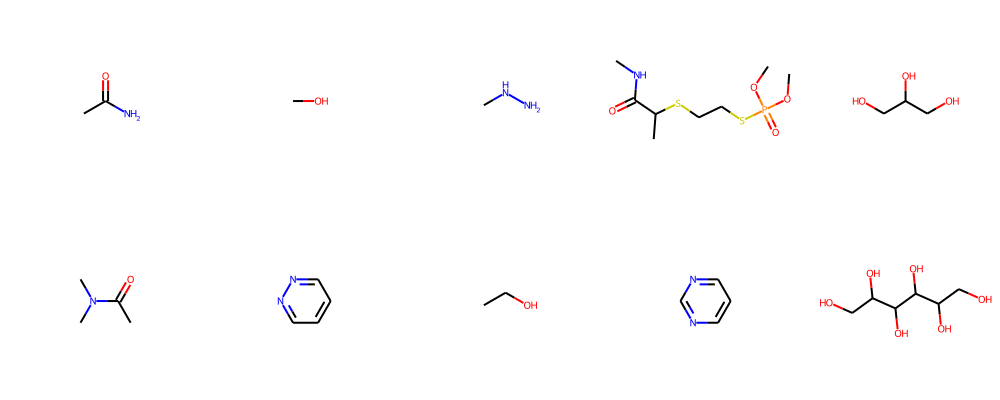

The least soluble compounds in the dataset:


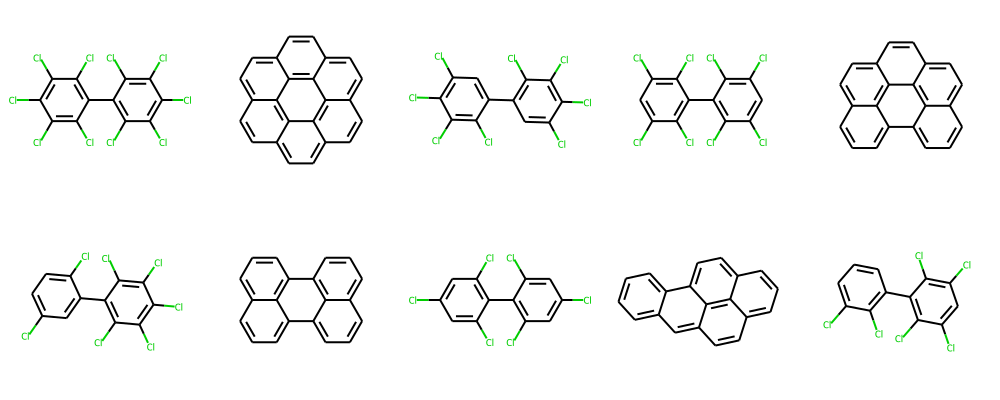

In [21]:
print('The most soluble compounds in the dataset:')
smiles_list = df.sort_values('measured log solubility in mols per litre', ascending=False).iloc[:10].smiles
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))
print('The least soluble compounds in the dataset:')
smiles_list = df.sort_values('measured log solubility in mols per litre', ascending=True).iloc[:10].smiles
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))

## BBBP

In [ ]:
def load_train_val_test_indices(path: str) -> List[np.ndarray]:
    fold_indices = np.load(path)
    return fold_indices['test'], fold_indices['valid'], fold_indices['train']


def load_bbbp(split_path='../data/bbbp/split.npz'):
    df = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv')
    fold_indices = load_train_val_test_indices(split_path)
    return df, fold_indices


def train(X_train, y_train, X_valid, y_valid):
    # TODO: create and train your model 
    model = None
    return model


def predict(model, X_test, y_test):
    # TODO: use your trained model to predict solubility
    return np.random.uniform(0., 1., size=len(y_test))


class NullFeaturizer(Featurizer):
    def __call__(self, df):
        predictions = []
        labels = []
        for i, row in df.iterrows():
            predictions.append(0)
            labels.append(row[self.y_column])
        predictions = np.array(predictions)
        labels = np.array(labels)
        return predictions, labels

df, fold_indices = load_bbbp()
# TODO: write a new featurizer and replace the one below
featurizer = NullFeaturizer(y_column='p_np')

train_data, valid_data, test_data = split_data(df, fold_indices)
X_train, y_train = featurizer(train_data)
X_valid, y_valid = featurizer(valid_data)
X_test, y_test = featurizer(test_data)

model = train(X_train, y_train, X_valid, y_valid)
predictions = predict(model, X_test, y_test)
rocauc_score = rocauc(y_test, predictions)
print(f'ROC AUC = {rocauc_score:.2f}')

## Lista rankingowa

Poniżej lista rankingowa rozwiązań z zajęć.

### Rozpuszczalność (ESOL)

| Pseudonim          | Reprezentacja         | Algorytm             | RMSE       | MAE        | R2         |
| ------------------ | --------------------- | -------------------- | ---------- | ---------- | ---------- |
| Delaney            | cLogP + RB + MWT + AP | Linear regression    | 0.91±0.052 | 0.70±0.051 | 0.81±0.023 |

### Bariera krew-mózg (BBBP)

| Pseudonim          | Reprezentacja   | Algorytm             | ROC AUC |
| ------------------ | --------------- | -------------------- | ------- |

# Q&A 🤔